# Local python packages

In my day job as a health data scientist, I've often found that for a given project it is useful to **package** up the project code into a reusable toolkit.  Packages open up a cleaner and more maintainable route to sharing code with collaborators, students and clients.  It also forces me to think about code/module design and testing more than just using a simple module. 


A local **python or module package** is in its essense a directory of modules that represents a python namespace.  In classic python text books, packages are often treated as an advanced topic.  I don't particularly agree with this classification. I will acknowledge that it is slightly more manual than other languages I have used, but note that it is less so than some others!  There's also a bit of a legacy hangover from python 2.x in my opinion. I think for the most part it is best try creating one for yourself. Be prepared to make a few mistakes and take copious notes in order to avoid making those mistakes again in future projects. Here we will look at a basic package to get you started.  There's definitely more to learn about packages, and I encourage you to read more specialised (standard python) texts on packages. I expect the content here should help you with 90-95% of the use cases you will need (do tell me if you think I am wrong!).

I've created local python packages to help me organise and reuse code in a variety of areas.  It is an eclectic mix - here are a few: 

* A toolkit that provides custom ensemble forecasting models for ambulance services
* A time series toolkit to support the UK's NHS with the fundamental's of forecasting.
* A meta-heuristic framework to support students learning about analysing logistic problems in health services
* A package of reinforcement learning agents to solve stochastic multi-arm bandit problems
* A framework for simulation based ranking and selection 
* A toolkit for pre-processing high frequency vital sign observations from critically ill children


Sometimes a local package can be useful for providing a higher level, convenience, special case, or extended API for one or more existing data science packages (such as `sklearn`, `statsmodels`, `pandas`, or `matplotlib`). That is the use case we will explore here.  We will build a simple local package that provides a specialised interface for plotting health service time series. We won't make this an extensive package, but you will learn the tools we need to create future more comprehensive packages.

## A simple skeleton package

The template below represents a very simple analysis package:

```
my_package_name
├── __init__.py
├── module_1.py
├── module_2.py
├── package_data
│   ├── example_dataset_1.csv
│   ├── example_dataset_2.csv
```

### The package name

`my_package_name` is a directory and the name of your package.  Its the name that goes after `import` when you want to use it in your code.  Personally, I find choosing a meaningful and snappy name difficult! In fact, I might change my mind once or twice during its development.  Don't worry too much about this, but just be aware that the longer a package name is in place the more code you are likely to have to check and update after you change it!

As an example, my code package for meta-heuristics is called `metapy`  it is a mash up of **meta**-heuristics and **py**thon.  (It perhaps isn't perfect!).  My package to support the NHS with the forecasting process is called `forecast-tools`.  This one went through a few iterations before I settled on it (I will spare you the horrible names I chose before!).

###  The `__init__.py` file

The `__init__.py` file sits within the `my_package_name` directory.  The file let's the python interpretor know that `my_package_name` is a python package that can be imported.  The file **can** be completely empty if required.  However, at a minimum I would recommend including a version number and author.  For example:

```python
__version__ = '0.1.0'
__author__ = 'Tom Monks'
```

#### Side bar: package versions


The `__version__` attribute is really useful to you and helps you (or a collaborator) check the version or release number of the code you are using (as this will incrementally change over the lifetime of the package). `__version__` uses the format: 

```
v<major>.<minor>.<patch>
```
When I first create a package it is conventional to build minor features incrementally up to a point where you have your first major release.  If we had v0.1.0 this would usually signifiy a very early version of the package with very limited functionality. 

When you are using and developing v0.2.0 of the package you might find a bug that you missed in v0.1.0.  You might want or need to solve that in a patch.  So you would have v0.1.1 of the code.  Note that no new functionality was added in v0.1.1 - it simply patched (fixed a bug in) existing functionalty.  

Finally you might have a shiney first milestone version of the code available.  This would be your v1.0.0 

> Sometimes it can take packages many years to get to this point.  For example, a favourite package of many health data scientist is `sklearn`.  At the time of writing in 2021 this is at version 0.24!

### Sub-modules

The two modules included in the skeleton example contain related python variables (constants), classes, and functions. In other words they contain the code that does all the work in your package. For example we might have a module `datasets` used for loading one or more example data sets included in the package and `plotting` that provides high level factory type functions for specialised `matplotlib` charts (e.g. regression diagnostics).  We import these namespaces as follows:

```python
import my_package_name.plotting
import my_package_name.datasets
```

If we assume `plotting` contains a function called `plt_diagnostics()` we import it as follows

```python
from my_package_name.plotting import plt_diagostics
```

### Including a `package_data` dir

It is sometimes helpful to include a sub directory within the package that contains a **small** dataset file (e.g. a Comma Seperated Value file; .csv).  This would include a real or synthetic dataset file that can be used in a tutorial for your package.  For health data science, I recommend synthetic data modelled (or based) on real data.  I also emphasise that the dataset should be small in order to avoid a package MBs (or sometimes GBs) in size.  

If you include data within your project then you might also want to follow the package pattern below

```
my_package_name
├── __init__.py
├── module_1.py
├── ...
├── module_n.py
├── datasets.py
├── package_data
│   ├── example_dataset_1.csv
│   ├── example_dataset_2.csv
```

where `datasets` contains the functions needed to load the dataset from file and return it in a suitable format.  It's worth noting that major data science packages opt for this approach.  For example `statsmodels`

In [1]:
import statsmodels.api as sm

# note that if provides a __version__
sm.__version__

'0.12.2'

In [2]:
# load the breast cancer dataset as a pandas dataframe
# a slight difference is that in sm each data set has its own sub module 
breast_cancer = sm.datasets.cancer.load_pandas()
breast_cancer.data.head(2)

,cancer,population
0,1.0,445.0
1,0.0,559.0


### Where does a local package live?

A local python package is effectively a sub-directory of code that needs to use it.  Here's an example.

```
analysis_notebook.ipynb
cmdline_program.py
my_package_name
├── __init__.py
├── module_1.py
├── ...
├── module_n.py
├── datasets.py
├── package_data
│   ├── example_dataset_1.csv
│   ├── example_dataset_2.csv
```

In this example, `analysis_notebook.ipynb` is a Jupyter notebook and `cmdline_program.py` is a python program run from the command line (e.g. `python3 cmdline_program.py`).  These files import and execute code from the `my_package_name` namespaces.

## An example package

Let's create a simple example package called `ts_emergency`.  Its purpose is to provide high level and convenient plotting functionality for emergency department time series data.  We will include some example data in `ed_ts_mth.csv` that we can use for plotting.

```
ts_emergency
├── __init__.py
├── plotting.py
├── datasets.py
├── data
│   ├── ed_ts_mth.csv
```

A GitHub repo with this structure and code can be found here: [https://github.com/health-data-science-OR/ts-emergency](https://github.com/health-data-science-OR/ts-emergency)

## Local package imports from `ts_emergency`

These are usually found after the standard imports such as `pandas`, `matplotlib` and `numpy`

One option is to import the whole package and - optionally - provide it an alias (as you would do for `numpy` and `pandas`)

In [3]:
import ts_emergency as tse

Alternatively you can use the **from** statement to import a package.  This is a stylistic choice, but one benefit of using from is that you don't need to retype the full path each time you use a function. That may or may not be important for your application.  Another more subtle benefit I've found is that when first designing a package I tend to rename modules and sometimes change package structure.  Importing using `from` statement means I only need to update the import section of my code - as opposed to all individual calls to a function. 

In [4]:
from ts_emergency.datasets import load_ed_ts
from ts_emergency.plotting import (plot_single_ed, plot_eds)

## Package information.

In [5]:
print(tse.__version__)
print(tse.__author__)

0.1.0
Tom Monks


## Using docstrings for built in help

When you are using an IDE such as spyder, vscode or Jupyter you can use intellisense to dynamically view docstrings of modules, class and functions included in a package.  But you can also use classic the `help` built-in.

In [6]:
help(tse.datasets)

Help on module ts_emergency.datasets in ts_emergency:

NAME
    ts_emergency.datasets

DESCRIPTION
    Functions to load built in datasets for ts_emergency.
    Datasets are downloaded from an external github repo.
    
    The key loading function is load_ed_ts

FUNCTIONS
    load_ed_ts(data_format='wide', as_pandas=True)
        Load the built-in ED dataset
        
        Params:
        ------
        data_format: str
            'Wide' or 'long' format.  Wide format provides hospital columns.
            Long format provides a categorical hospital column and single attends
            column.
            
        as_pandas: bool, optional (default = True)
            Return as `pandas.Dataframe`.  If False then `numpy.ndarray`
            
        Returns:
        -------
        pandas.Dataframe or if `as_pandas=False` then returns `numpy.ndarray`

DATA
    LONG_URL = 'https://raw.githubusercontent.com/health-data-science-OR/h...
    WIDE_URL = 'https://raw.githubusercontent.com

## Using the imported package functions

Once you have imported the package functions then it is just standard python to call them and pass parameters.  For example using the functions in the `ts_emergency_datasets` namespace.

In [7]:
# directly imported function
df = load_ed_ts(data_format='wide', as_pandas=True)
df.head(2)

,hosp_1,hosp_2,hosp_3,hosp_4
date,,,,
2014-04-01,331,287,195,184
2014-04-02,340,293,177,181


In [8]:
# full package path to function
df = tse.datasets.load_ed_ts()
df.head(2)

,hosp_1,hosp_2,hosp_3,hosp_4
date,,,,
2014-04-01,331,287,195,184
2014-04-02,340,293,177,181


Using functions in the `ts_emergency.plotting` namespace

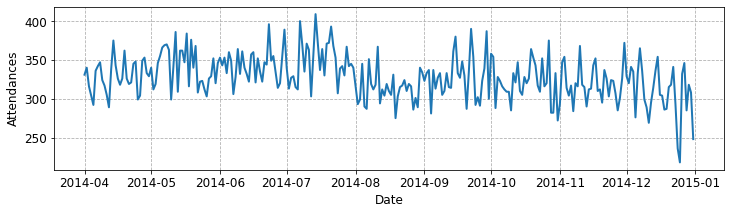

In [9]:
fig, ax = plot_single_ed(df, 'hosp_1')

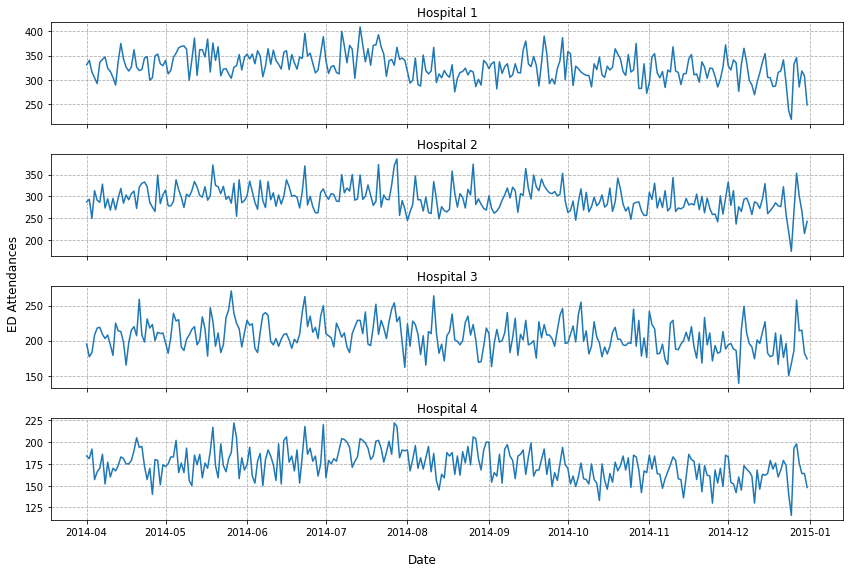

In [10]:
fig = plot_eds(df)

## Packages - summing up

Just to repeat, there is definitely more to python packages than I can cover here.  For the interested reader I would recommend checking out Lutz's: Learning Python. Relative imports inside of packages is a particular area I would recommend.